In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#importing data

In [1]:
!mkdir -p ~/.kaggle

In [2]:
! cp "/content/drive/MyDrive/Colab Notebooks/kaggle.json" ~/.kaggle/

In [3]:
! kaggle datasets download shayanfazeli/heartbeat

 99% 98.0M/98.8M [00:02<00:00, 56.8MB/s]
100% 98.8M/98.8M [00:02<00:00, 48.4MB/s]


In [4]:
!unzip "/content/heartbeat.zip"

Archive:  /content/heartbeat.zip
  inflating: mitbih_test.csv         
  inflating: mitbih_train.csv        
  inflating: ptbdb_abnormal.csv      
  inflating: ptbdb_normal.csv        


In [5]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
df = pd.read_csv('/content/mitbih_train.csv')
df

,9.779411554336547852e-01,9.264705777168273926e-01,6.813725233078002930e-01,2.450980395078659058e-01,1.544117629528045654e-01,1.911764740943908691e-01,1.519607901573181152e-01,8.578431606292724609e-02,5.882352963089942932e-02,4.901960864663124084e-02,...,0.000000000000000000e+00.79,0.000000000000000000e+00.80,0.000000000000000000e+00.81,0.000000000000000000e+00.82,0.000000000000000000e+00.83,0.000000000000000000e+00.84,0.000000000000000000e+00.85,0.000000000000000000e+00.86,0.000000000000000000e+00.87,0.000000000000000000e+00.88
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87548,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87549,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


#data cleaning

In [7]:
print(df.isna().sum().unique())
print(df.isnull().sum().unique())

[0]
[0]


In [8]:
for column in df.columns:
  print(f"number of unique values for {column}: {len(df[column].unique())}")

number of unique values for 9.779411554336547852e-01: 23408
number of unique values for 9.264705777168273926e-01: 42845
number of unique values for 6.813725233078002930e-01: 49611
number of unique values for 2.450980395078659058e-01: 41007
number of unique values for 1.544117629528045654e-01: 39328
number of unique values for 1.911764740943908691e-01: 40559
number of unique values for 1.519607901573181152e-01: 40516
number of unique values for 8.578431606292724609e-02: 40423
number of unique values for 5.882352963089942932e-02: 40305
number of unique values for 4.901960864663124084e-02: 39950
number of unique values for 4.411764815449714661e-02: 40106
number of unique values for 6.127450987696647644e-02: 40347
number of unique values for 6.617647409439086914e-02: 40320
number of unique values for 6.127450987696647644e-02.1: 40628
number of unique values for 4.901960864663124084e-02.1: 41177
number of unique values for 7.352941483259201050e-02: 41671
number of unique values for 6.127450

#EDA

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df):
    for column in df.columns:
      # Create histogram
      plt.hist(df[column].to_numpy().flatten(), density=True, bins=30, edgecolor='black', alpha=0.7)
      # Add distribution line (kernel density estimate)
      sns.kdeplot(df[column])
      # Add labels and title
      plt.xlabel('Value')
      plt.ylabel('Frequency')
      plt.title(f'Histogram of {column}')
      # Show plot
      plt.show()

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix', fontsize=15)
    plt.show()

In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [ ]:
plotPerColumnDistribution(df)

Output hidden; open in https://colab.research.google.com to view.

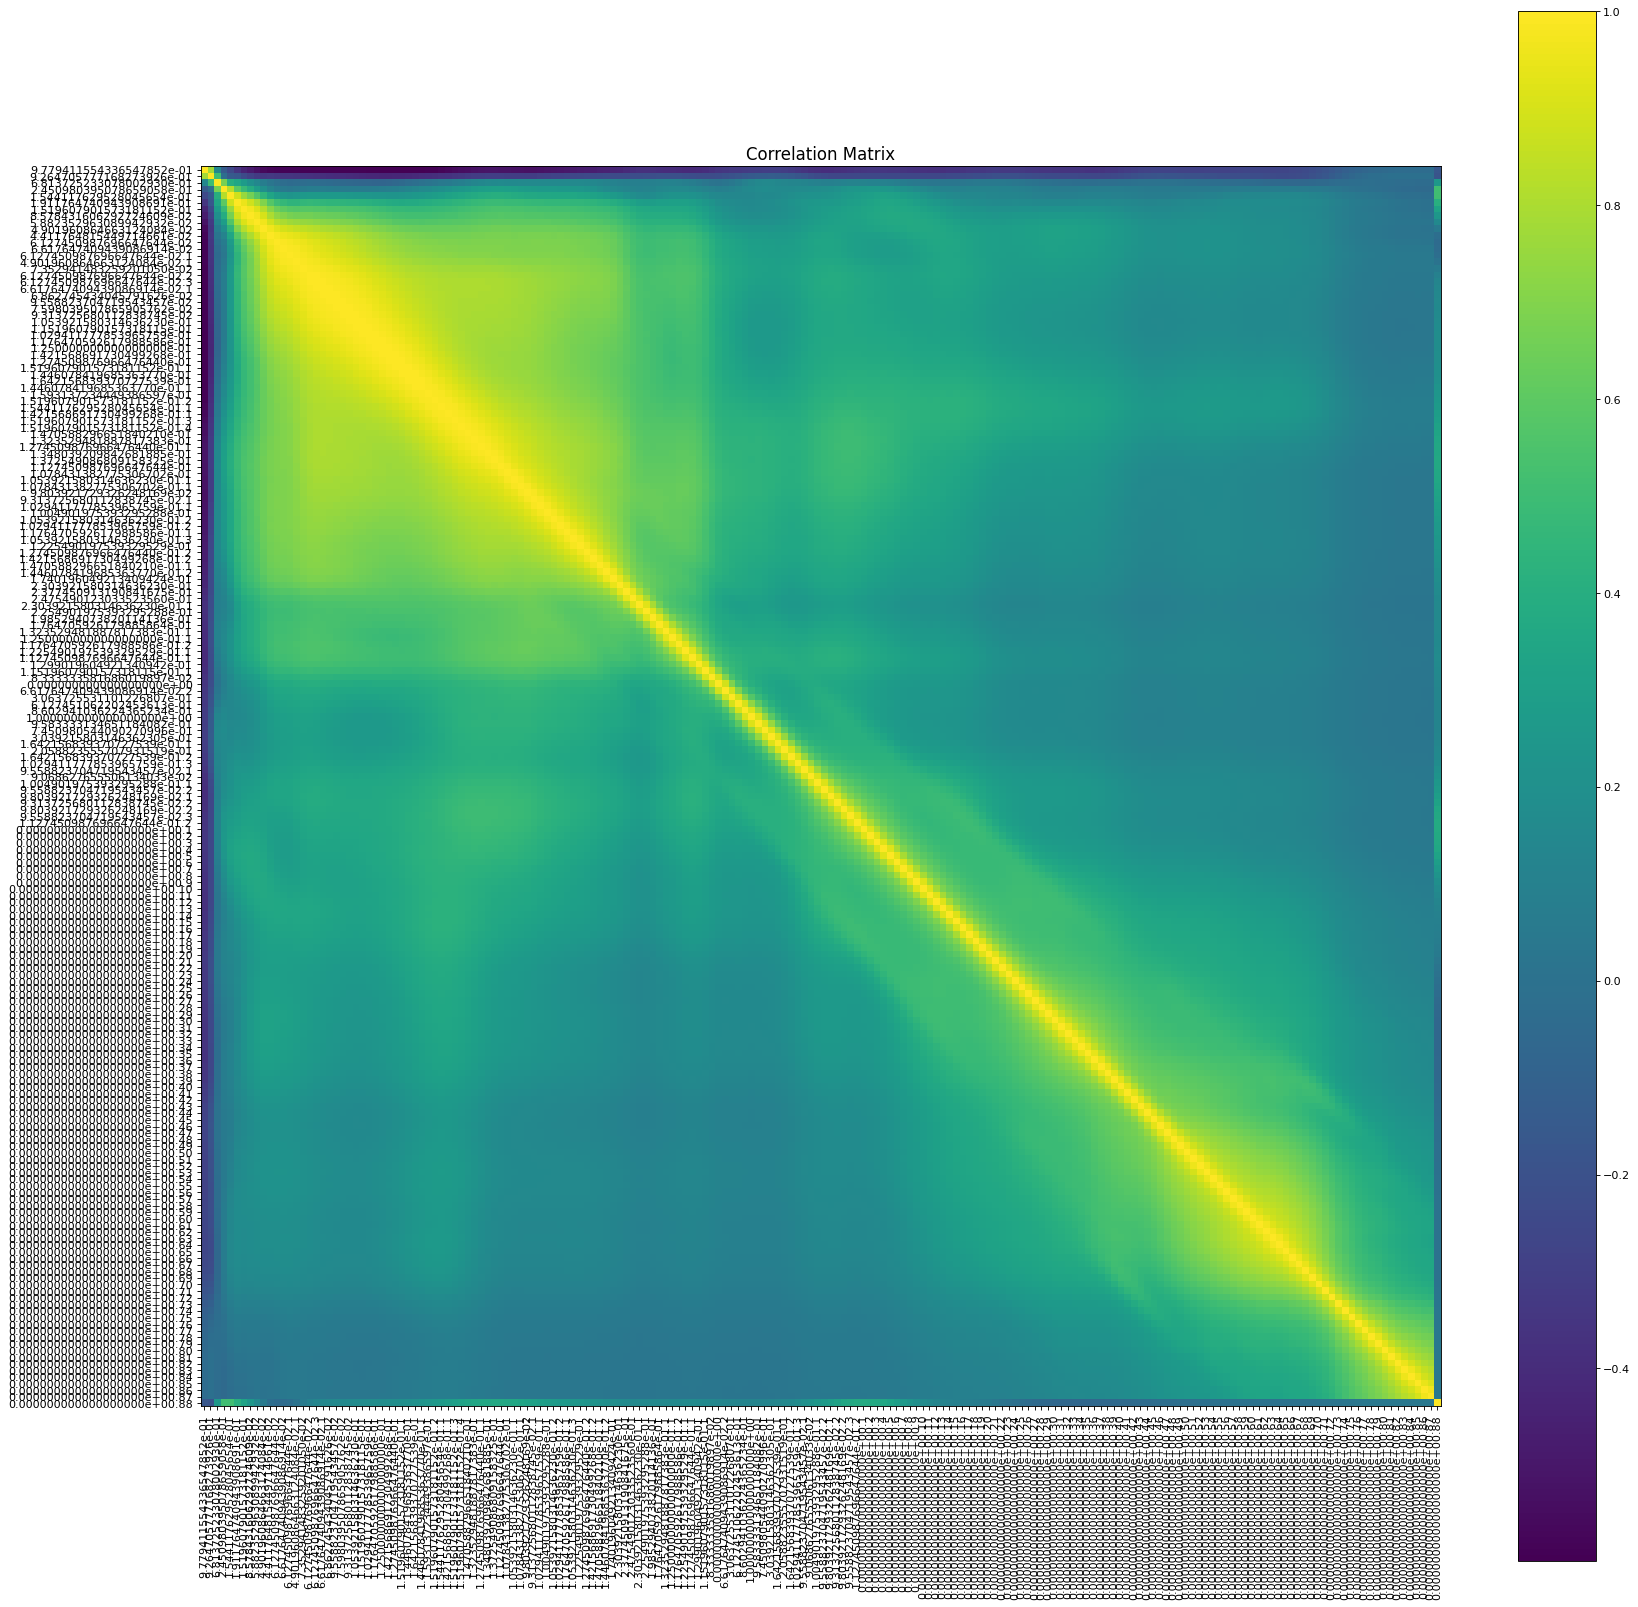

In [ ]:
plotCorrelationMatrix(df, 25)

In [ ]:
plotScatterMatrix(df, 20, 10)

Output hidden; open in https://colab.research.google.com to view.

#preprocesing

In [9]:
from sklearn.preprocessing import StandardScaler
# Initialize the scaler
std_scaler = StandardScaler()

columns = df.columns.tolist()
columns.pop()

for column in columns:
    # Reshape the data to a 2D array
    column_data = df[column].values.reshape(-1, 1)

    # Scale numerical columns
    scaled_data = std_scaler.fit_transform(column_data)

    # Convert scaled data back to DataFrame
    df[column] = scaled_data

#modeling

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# 1. Prepare your data
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()
y = y.astype("int")

# Assuming X contains features and y contains target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Apply K-fold cross-validation with over-sampling
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize SMOTE for over-sampling
smote = SMOTE(random_state=42)

# Lists to store cross-validation scores
cv_scores = []

# 2. Define models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(11),
    'SVM': SVC(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

# 3. Train models
for name, model in models.items():
  cv_scores.append([])
  # Perform K-fold cross-validation with over-sampling
  for train_index, val_index in k_fold.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Apply SMOTE only on training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_fold, y_train_fold)

    # Train classifier
    model.fit(X_train_resampled, y_train_resampled)

    # Evaluate on validation set
    cr = classification_report(y_val_fold, model.predict(X_val_fold))
    print(f"classification_report for {name}: {cr}")
    cv_scores[-1].append(cr)

# 4. Evaluate models
results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    cr = classification_report(y_test, y_pred)
    results[name] = cr

# 5. Compare results
for name, cr in results.items():
  print("\n")
  print(f'classification_report for {name}:')
  print(cr)
  print("\n")

KeyboardInterrupt: 

In [ ]:
df_test = pd.read_csv('/content/mitbih_test.csv')
df

,9.779411554336547852e-01,9.264705777168273926e-01,6.813725233078002930e-01,2.450980395078659058e-01,1.544117629528045654e-01,1.911764740943908691e-01,1.519607901573181152e-01,8.578431606292724609e-02,5.882352963089942932e-02,4.901960864663124084e-02,...,0.000000000000000000e+00.79,0.000000000000000000e+00.80,0.000000000000000000e+00.81,0.000000000000000000e+00.82,0.000000000000000000e+00.83,0.000000000000000000e+00.84,0.000000000000000000e+00.85,0.000000000000000000e+00.86,0.000000000000000000e+00.87,0.000000000000000000e+00.88
0,0.289550,0.473776,0.165282,-0.108868,-0.604947,-0.494700,-0.594425,-0.640123,-0.725468,-0.677949,...,-0.113797,-0.109953,-0.105881,-0.102064,-0.098977,-0.095749,-0.092597,-0.089594,-0.08794,-0.414091
1,0.455115,-0.444966,-1.044783,-0.719425,-0.739066,-0.878023,-0.835114,-0.894444,-0.842014,-0.895791,...,-0.113797,-0.109953,-0.105881,-0.102064,-0.098977,-0.095749,-0.092597,-0.089594,-0.08794,-0.414091
2,0.145514,-0.416625,0.516786,0.276198,-0.028211,-0.773965,-0.750699,-0.795537,-0.770734,-0.824127,...,-0.113797,-0.109953,-0.105881,-0.102064,-0.098977,-0.095749,-0.092597,-0.089594,-0.08794,-0.414091
3,0.318699,1.090297,1.790631,1.777619,0.879263,0.223530,-0.337676,-0.635142,-0.473415,-0.276339,...,-0.113797,-0.109953,-0.105881,-0.102064,-0.098977,-0.095749,-0.092597,-0.089594,-0.08794,-0.414091
4,0.154010,1.090297,0.892963,-0.124067,-0.599445,-0.801940,-0.911194,-0.836346,-0.613752,-0.040245,...,-0.113797,-0.109953,-0.105881,-0.102064,-0.098977,-0.095749,-0.092597,-0.089594,-0.08794,-0.414091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87548,-0.345945,-1.187587,0.496573,1.501950,1.638454,1.592768,1.402566,1.098610,0.497841,-0.355888,...,-0.113797,-0.109953,-0.105881,-0.102064,-0.098977,-0.095749,-0.092597,-0.089594,-0.08794,3.084911
87549,-0.714068,-0.690486,0.275831,0.689115,0.172482,-0.525857,-0.863633,-1.129023,-1.156690,-1.089502,...,-0.113797,-0.109953,-0.105881,-0.102064,-0.098977,-0.095749,-0.092597,-0.089594,-0.08794,3.084911
87550,0.065434,-0.602620,0.756473,1.722783,1.860891,1.577772,1.339577,1.049320,0.720446,-0.029233,...,-0.113797,-0.109953,-0.105881,-0.102064,-0.098977,-0.095749,-0.092597,-0.089594,-0.08794,3.084911
87551,-0.133374,-0.507585,1.854790,0.140167,-0.192248,-0.458114,-0.472262,-0.452806,-0.464005,-0.552166,...,-0.113797,-0.109953,-0.105881,-0.102064,-0.098977,-0.095749,-0.092597,-0.089594,-0.08794,3.084911


In [ ]:
# Prepare your test data
X = df_test.iloc[:, :-1]
y = df_test.iloc[:, -1]
y = y.astype("int")

# test Evaluatation of models
results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Compare results
for name, accuracy in results.items():
    print(f'{name}: Test Accuracy = {accuracy}')

Random Forest: Test Accuracy = 0.9847524413225972
KNN: Test Accuracy = 0.9765290388898407
SVM: Test Accuracy = 0.9783564616526754
XGBoost: Test Accuracy = 0.9888070355776369
